# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
%pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is inc

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.20.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from kaggle to google colab

In [ ]:
# install kaggle API
! pip install kaggle

In [ ]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
# import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [ ]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# list of datasets
! kaggle datasets list

ref                                                               title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                       Uber Data Analytics Dashboard                       17324552  2025-08-08 11:13:42.920000          48127       1067  1.0              
mosapabdelghany/medical-insurance-cost-dataset                    Medical Insurance Cost Dataset                         16425  2025-08-24 11:54:36.533000           2741         69  1.0              
zadafiyabhrami/global-crocodile-species-dataset                   Global Crocodile Species Dataset                       57473  2025-08-26 08:46:11.950000           2223         71  1.0              


In [ ]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 774MB/s]


In [ ]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
dataset_1  = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [ ]:
dataset_1.shape

(284807, 31)

In [ ]:
# checking the null values
dataset_1.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# observations in each class
dataset_1['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# balence the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [ ]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [ ]:
non_fraud_t.shape

(492, 31)

In [ ]:
# merge dataset
dataset = pd.concat([fraud, non_fraud_t], ignore_index=True)

In [ ]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979   60742.0 -1.044681  0.190748  2.357498 -1.652204 -0.557911 -1.148812   
980  160179.0 -0.247053 -0.081788  1.444556 -1.841741 -0.703963 -0.524701   
981   81533.0  1.257618 -0.709406  0.603668 -0.744141 -1.133449 -0.390146   
982  136634.0  1.969452 -1.426023 -0.712351 -0.865579 -1.180302 -0.307034   
983  159469.0  1.976832  0.161946 -1.350047  0.759081 -0.348631 -2.049790   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [ ]:
# observations in each class
dataset['Class'].value_counts()

,count
Class,
1,492
0,492


In [ ]:
# matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [ ]:
# dependent variable
y = dataset['Class']

In [ ]:
x.shape, y.shape

((984, 30), (984,))

In [ ]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.76039317, -0.22146564,  0.33522893, ..., -0.63277531,
        -0.19460872, -0.40146071],
       [-0.78553248,  0.51047512, -0.10168293, ...,  0.47918563,
         0.60942003, -0.41041032],
       [-0.82217762,  0.19081941,  0.09374258, ...,  0.31606954,
         0.45540023, -0.40945143],
       ...,
       [-0.3253612 ,  0.37192177, -0.04375845, ...,  0.0352138 ,
        -0.00286169, -0.41041032],
       [ 1.35471741,  0.83688157, -0.54576006, ..., -0.2177282 ,
        -0.27340696, -0.40829278],
       [-0.09683514,  0.68464145, -0.42280525, ..., -0.13687688,
        -0.12346589, -0.40014225]])

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [ ]:
# defining an object
model = tf.keras.models.Sequential()

In [ ]:
# add an Input layer explicitly
model.add(tf.keras.layers.Input(shape=(30, 1)))

# first CNN layer (no input_shape here)
model.add(tf.keras.layers.Conv1D(
    filters=32,
    kernel_size=2,
    padding='same',
    activation='relu'
))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


In [ ]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 30, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,441 (130.63 KB)

 Trainable params: 33,249 (129.88 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the model

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5221 - loss: 1.0283 - val_accuracy: 0.7563 - val_loss: 0.6509
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6812 - loss: 0.6619 - val_accuracy: 0.7056 - val_loss: 0.6104
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7006 - loss: 0.5655 - val_accuracy: 0.6802 - val_loss: 0.5877
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7950 - loss: 0.4526 - val_accuracy: 0.6802 - val_loss: 0.5731
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7810 - loss: 0.4530 - val_accuracy: 0.6802 - val_loss: 0.5584
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8218 - loss: 0.4428 - val_accuracy: 0.6904 - val_loss: 0.5396
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8394 - loss: 0.4056 - val_accuracy: 0.6904 - val_loss: 0.5164
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8188 - loss: 0.4131 - val_accuracy: 0.7157 - val_lo

In [ ]:
# model predictions
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
print(y_pred[12]), print(y_test[12])

[0.9999501]
1


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9543147208121827


# Step 6: Learning Curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

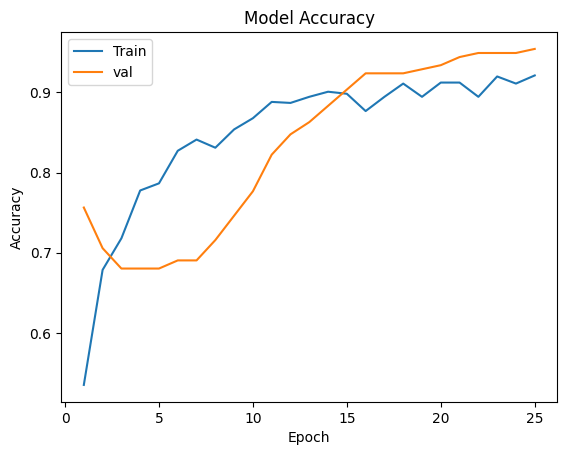

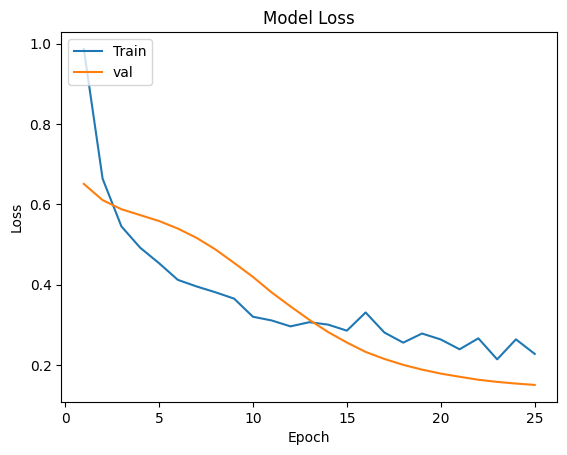

In [ ]:
learning_curve(history, 25)